# Lập trình KHDL - Đồ án cuối kì

**Sinh viên thực hiện**

|Họ Tên|MSSV|
|---|---|
|Hoàng Dược Lam|19120267|
|Trần Mỹ Hân|19120217|

# Môi trường sử dụng

In [1]:
import sys
sys.executable

'/home/han/miniconda3/envs/min_ds-env/bin/python'

---

# Import thư viện

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# Thông tin về dữ liệu

- Dữ liệu được sử dụng là thống kê về ứng dụng của Google Playstore, bao gồm các thông tin về đánh giá của người dùng về ứng dụng. Nguồn của dữ liệu được lấy từ [kaggle](https://www.kaggle.com/gauthamp10/google-playstore-apps)
- Về quyền sử dụng dữ liệu, tác giả cho phép sử dụng dữ liệu dựa trên MIT license, được tải lên repo trên githu. License được cung cấp [ở đây](https://github.com/gauthamp10/Google-Playstore-Dataset/blob/main/LICENSE)
- Dữ liệu được thu thập từ Google PlayStore Android App vào tháng 6/2021 bằng Python (Scrapy) chạy trên (instance) VMCloud bởi [Gautham Prakash](https://github.com/gauthamp10)


---

# Khám phá dữ liệu

## Đọc dữ liệu từ file csv vào dataframe

In [3]:
df = pd.read_csv('Google-Playstore.csv')
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [4]:
num_rows = len(df)
num_cols = len(df.columns)
print(f'Có {num_rows} dòng và {num_cols} cột')

Có 2312944 dòng và 24 cột


## Dữ liệu có các dòng bị lặp không?

In [5]:
num_duplicated_rows = num_rows - len(df.duplicated(keep='first'))
print(f'Có {num_duplicated_rows} dòng bị lặp')

Có 0 dòng bị lặp


## Mỗi dòng và mỗi cột có ý nghĩa gì?

Trích và dịch lại theo mô tả trên kaggle:

Mỗi dòng chữa dữ liệu của ứng dụng với tổng số trên 600 ngàn gồm 24 thuộc tính sau: 
- **App Name**: Tên ứng dụng
- **App Id**: ID 
- **Category**: Thể loại
- **Rating**: Xếp hạng
- **Rating Count**: Số lượt xếp hạng
- **Installs**: Số lượt cài đặt (xấp xỉ)
- **Minimum Installs**: Số lượt cài đặt thấp nhất
- **Maximum Installs**: Số lượt cài đặt cao nhất
- **Free**: Ứng dụng có miễn phí hay không
- **Price**: Giá tiền
- **Currency**: Đơn vị tiền tệ
- **Size**: Kích thước
- **Minimum Android**: Phiên bản Android hỗ trợ tối thiểu
- **Developer Id**: ID của nhà phát triển trong Google Playstore
- **Developer Website**: Website của nhà phát triển 
- **Developer Email**: Email của nhà phát triển
- **Released**: Ngày phát hành ứng dụng
- **Last Updated**: Ngày cập nhật gần nhất
- **Content Rating**: Xếp hạng nội dung
- **Privacy Policy**: Chính sách quyền riêng tư từ nhà phát triển
- **Ad Supported**: Hỗ trợ quảng cáo trong ứng dụng hay không
- **In app purchases**: Hỗ trợ mua hàng trong ứng dụng
- **Editor Choice**: Có nằm trong hạng mục "Editors' choice" hay không
- **Scraped Time**: Thời gian thu thập thông tin ứng dụng

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
df.dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

**Các vấn đề nhận thấy**:
- Thay giá trị `NaN` trong các cột "Rating", "Rating Count", "Minimum Installs" thành giá trị nào đó hợp lý.
- 'Minimum Installs' và 'Rating Count' có dạng `float64`. Ta cần chuyển cột về dạng `int64`
- 'Install' được giải thích là lượt tải xấp xỉ, là một số kèm dấu '+' (VD: 500+) nên được để dạng object. Vì đã có 'Minimum Installs' chính là phần số trong 'Install', nên ta có thể bỏ cột 'Install'
- 'Size' là kích thước của ứng dụng, nhưng có kèm đơn vị đằng sau (k - Kb, M - Mb, G - Gb), nên về sau nếu có phần đặt câu hỏi liên quan đến cột này, có thể ta sẽ cần phải chuyển đổi về 1 đơn vị chuẩn, và bỏ đi 1 số giá trị chưa phù hợp
- Các cột 'Released', 'Last Updated', 'Scraped Time' đang có dạng `object`. Ta cần chuyển về`datetime`

## Tỷ lệ các giá trị thiếu

In [7]:
def missing_ratio(s):
    return s.isnull().mean() * 100

In [8]:
df.agg(missing_ratio)

App Name              0.000086
App Id                0.000000
Category              0.000000
Rating                0.989345
Rating Count          0.989345
Installs              0.004626
Minimum Installs      0.004626
Maximum Installs      0.000000
Free                  0.000000
Price                 0.000000
Currency              0.005837
Size                  0.008474
Minimum Android       0.282324
Developer Id          0.001427
Developer Website    32.894657
Developer Email       0.001340
Released              3.071972
Last Updated          0.000000
Content Rating        0.000000
Privacy Policy       18.199879
Ad Supported          0.000000
In App Purchases      0.000000
Editors Choice        0.000000
Scraped Time          0.000000
dtype: float64

Nhìn chung, các giá trị thiếu không nhiều, nên không cần phải bỏ đi cột nào có chứa quá nhiều giá trị thiếu

---

# Tiền xử lý

## Bỏ cột Installs

In [9]:
df.drop(columns = 'Installs', inplace = True)

## Thay các giá trị NaN thành giá trị hợp lý

Ta nhận thấy, ở 3 cột trên, giá trị nhỏ nhất có thể có là 0 (Không có lượt tải / đánh giá nào cả). Vì vậy, ta sẽ thay các giá trị NaN thành 0

In [10]:
df['Rating'] = df['Rating'].replace(np.nan, 0)
df['Rating Count'] = df['Rating Count'].replace(np.nan, 0)
df['Minimum Installs'] = df['Minimum Installs'].replace(np.nan, 0)

## Chuyển dtype của các cột 'Minimum Installs' và 'Rating Count' thành int64

Sau khi đã điều chỉnh các giá trị NaN thành 0, ta có thể chuyển dữ liệu 2 cột này thành int64

In [11]:
df['Minimum Installs'] = df['Minimum Installs'].astype(np.int64)
df['Rating Count'] = df['Rating Count'].astype(np.int64)

## Chuyển dtype của các cột 'Released', 'Last Updated', 'Scraped Time' thành datetime

In [12]:
df['Released'] = pd.to_datetime(df['Released'], format = '%b %d, %Y')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format = '%b %d, %Y')
df['Scraped Time'] = pd.to_datetime(df['Scraped Time'], format = '%Y-%m-%d %X')

Kiểm tra lại dtypes

In [13]:
df.dtypes

App Name                     object
App Id                       object
Category                     object
Rating                      float64
Rating Count                  int64
Minimum Installs              int64
Maximum Installs              int64
Free                           bool
Price                       float64
Currency                     object
Size                         object
Minimum Android              object
Developer Id                 object
Developer Website            object
Developer Email              object
Released             datetime64[ns]
Last Updated         datetime64[ns]
Content Rating               object
Privacy Policy               object
Ad Supported                   bool
In App Purchases               bool
Editors Choice                 bool
Scraped Time         datetime64[ns]
dtype: object

# Quay lại bước khám phá dữ liệu

## Với các cột có kiểu numeric và datetime ,các giá trị được phân bố như thế nào?

In [14]:
num_cols = df.agg(lambda x: x.dtypes != object and x.dtypes != bool)
num_cols = num_cols[num_cols].index.to_list()
df[num_cols].agg([min, max])

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Released,Last Updated,Scraped Time
min,0.0,0,0,0,0.0,2010-01-28,2009-02-09,2021-06-15 20:19:35
max,5.0,138557570,10000000000,12057627016,400.0,2021-06-16,2021-06-16,2021-06-16 15:10:42


Dựa trên phân bố trên:
- Theo cột "Rating", "Rating Count" thì có vẻ như có tận 25% các app không có đánh giá.

- Có vẻ như đa phần các app đều free nên phân vị thứ 25, 50, 75 của "Price" là 0 (hoặc gần bằng 0)

## Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [15]:
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

In [16]:
cate_cols = df.agg(lambda x: x.dtypes == object)
cate_cols = cate_cols[cate_cols].index.to_list()
df[cate_cols].agg([num_diff_vals, diff_vals])

,App Name,App Id,Category,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Content Rating,Privacy Policy
num_diff_vals,2177944,2312944,48,15,1657,154,758371,810440,950456,6,977743
diff_vals,"[Gakondo, Ampere Battery Info, Vibook, Smart C...","[com.ishakwe.gakondo, com.webserveis.batteryin...","[Adventure, Tools, Productivity, Communication...","[USD, XXX, CAD, EUR, INR, nan, VND, GBP, BRL, ...","[10M, 2.9M, 3.7M, 1.8M, 6.2M, 46M, 2.5M, 16M, ...","[7.1 and up, 5.0 and up, 4.0.3 and up, 4.1 and...","[Jean Confident Irénée NIYIZIBYOSE, Webserveis...","[https://beniyizibyose.tk/#/, https://webserve...","[jean21101999@gmail.com, webserveis@gmail.com,...","[Everyone, Teen, Mature 17+, Everyone 10+, Adu...","[https://beniyizibyose.tk/projects/, https://d..."


## Với mỗi cột có kiểu dữ liệu dạng bool, các giá trị được phân bố như thế nào?

In [17]:
def num_true_vals(s):
    return s.value_counts()[True]
def num_false_vals(s):
    return s.value_counts()[False]

In [18]:
bool_cols = df.agg(lambda x: x.dtypes == bool)
bool_cols = bool_cols[bool_cols].index.to_list()
df[bool_cols].agg([num_true_vals,num_false_vals])

,Free,Ad Supported,In App Purchases,Editors Choice
num_true_vals,2267876,1150774,195309,853
num_false_vals,45068,1162170,2117635,2312091


---

# Quay lại bước tiền xử lý

## Thêm cột "Year_released" vào dataframe 

Cột "Year_released" lưu năm phát hành của ứng dụng, phục vụ cho đặt câu hỏi.

In [19]:
df["Year_released"] = pd.DatetimeIndex(df['Released']).year
df.head()

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Year_released
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10,15,True,0.0,USD,...,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,2020.0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,5000,7662,True,0.0,USD,...,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,2020.0
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50,58,True,0.0,USD,...,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,2019.0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5,10,19,True,0.0,USD,...,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,NaN,True,False,False,2021-06-15 20:19:35,2018.0
4,GROW.me,com.horodyski.grower,Tools,0.0,0,100,478,True,0.0,USD,...,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,2020.0


## Thêm cột "Year_last_updated" vào dataframe

Cột "Year_last_updated" lưu năm cập nhật gần nhất của ứng dụng, phục vụ cho đặt câu hỏi.

In [20]:
df["Year_last_updated"] = pd.DatetimeIndex(df['Last Updated']).year
df.head()

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Year_released,Year_last_updated
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10,15,True,0.0,USD,...,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,2020.0,2020
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,5000,7662,True,0.0,USD,...,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,2020.0,2021
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50,58,True,0.0,USD,...,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,2019.0,2019
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5,10,19,True,0.0,USD,...,2018-09-10,2018-10-13,Everyone,NaN,True,False,False,2021-06-15 20:19:35,2018.0,2018
4,GROW.me,com.horodyski.grower,Tools,0.0,0,100,478,True,0.0,USD,...,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,2020.0,2018


# Đặt câu hỏi

- **Câu hỏi 1**: Số lượng app được phát hành qua các năm như thế nào?
- Trả lời được câu này sẽ giúp ta biết được xu hướng phát hành app qua các năm, biết được có nên đi theo hướng phát triển app không.

- **Câu hỏi 2**: Đâu là thể loại được nhiều người quan tâm nhất (nhiều người tải nhất)?
- Trả lời được câu này sẽ giúp ta biết được xu hướng sử dụng app của người tiêu dùng từ đó chọn được thể loại app nên phát triên khi phát triển app.

- **Câu hỏi 3**: Hệ điều hành Android tối thiểu được hỗ trợ phổ biến tính trên các ứng dụng được cập nhật trong năm 2021?
- Trả lời được câu này sẽ giúp ta biết được hệ điều hành Android nên chọn khi mua smartphone, vì mua smartphone có hệ điều hành cũ quá có thể sẽ không sử dụng được.

- **Câu hỏi 4**: Liệu các ứng dụng có phí và có quảng cáo thì khoảng phí bao nhiêu là hợp lí (dựa trên đánh giá của người dùng, từ 4.0 trở lên là hợp lí)?
- Ứng dụng trả phí và quảng cáo trong ứng dụng là một khoảng thu nhập thêm khá ổn ngoài lượt tải, trả lời được câu hỏi này ta có thể biết được ứng dụng với khoảng phí nào vẫn có thể thêm quảng cáo để kiếm thêm thu nhập mà không gây khó chịu cho người dùng.

---

# Trả lời câu hỏi

## Câu hỏi 1

In [21]:
released_count = df["Year_released"].value_counts().sort_index()

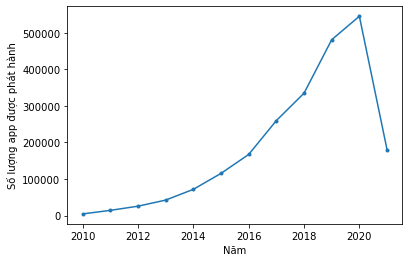

In [22]:
released_count.plot.line(xlabel = "Năm", ylabel = "Số lượng app được phát hành", marker = ".")
plt.show()

Đánh giá biểu đồ:
- Nhìn chung thì số lượng app được phát hành tăng dần qua các năm, ngoại trừ năm 2021, nhưng do dữ liệu này được lấy vào tháng 6 năm 2021 nên ta có thể bỏ qua năm 2021.
- Chỉ trong vòng 10 năm, từ 2010 chưa có bao nhiêu app đến năm 2020 lại có hơn 500000 app được phát hành thì ta có thể thấy app phát triển rất mạnh mẽ. Điều này có thể là do sự phát triển mạnh mẽ của smartphone, hầu như ai cũng có smartphone dù họ không có máy tính.
- Như vậy đây là một lĩnh vực có triển vọng, nếu có thể cũng có thể thử phát triển app.

## Câu hỏi 2

In [23]:
category_count_by_install = df.groupby(by=['Category'])['Minimum Installs'].sum()

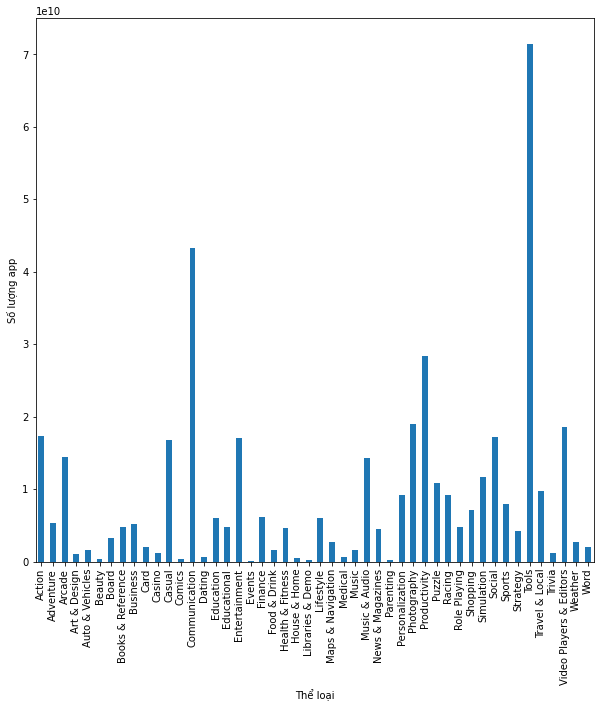

In [24]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
category_count_by_install.plot.bar(xlabel = "Thể loại", ylabel = "Số lượng app")
plt.show()

Đánh giá biểu đồ:
- Thể loại Tools có nhiều người tải nhất, kế đến là Communication.
- Thể loại Events có ít người tải nhất.
- Như vậy, với người dùng, người ta quan tâm tới các ứng dụng dạng Tools nhiều nhất, kế đến là các ứng dụng Communication. Trên thực tế, các ứng dụng Communication phổ biến không nhiều lắm nên không khuyến khích phát triển ứng dụng Communication, nếu phát triển ứng dụng thì nên thử thể loại Tools.

## Câu hỏi 3

In [25]:
app_updated_2021 = df[df["Year_last_updated"] == 2021]
min_hdh_count = app_updated_2021["Minimum Android"].value_counts().sort_index()

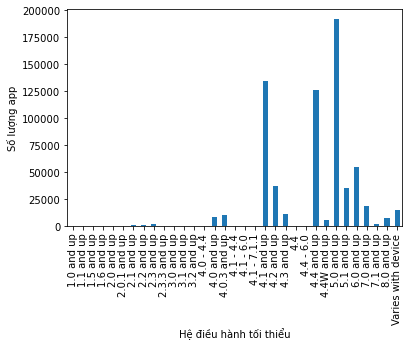

In [26]:
min_hdh_count.plot.bar(xlabel = "Hệ điều hành tối thiểu", ylabel = "Số lượng app")
plt.show()

Đánh giá biểu đồ:
- Đa phần hệ điều hành tối thiểu đều từ 4.0 trở lên.
- Hệ điều hành tối thiểu là 5.0 có số lượng cao nhất.
- Hệ điều hành tối thiểu cao nhất là 8.0.
- Như vậy khi mua smartphone, ta nên chọn máy có hệ điều hành từ 5.0 trở lên để có thể sử dụng được phần lớn các ứng dụng, và nên mua 8.0 để có thể sử dụng được hầu hết các ứng dụng.

## Câu hỏi 4

In [27]:
non_free = df[df["Free"] == False]
non_free_have_ad = non_free[non_free["Ad Supported"] == True]
non_free_have_ad_rating_4 = non_free_have_ad[non_free_have_ad["Rating"] >= 4.0]
price_ = dict()
price_["< 1"] = len(non_free_have_ad_rating_4[non_free_have_ad_rating_4["Price"] < 1.0])
price_["1 - 10"] = len(non_free_have_ad_rating_4[(non_free_have_ad_rating_4["Price"] >= 1.0)
                                                    & (non_free_have_ad_rating_4["Price"] < 10.0)])
price_["10 - 50"] = len(non_free_have_ad_rating_4[(non_free_have_ad_rating_4["Price"] >= 10.0)
                                                    & (non_free_have_ad_rating_4["Price"] < 50.0)])
price_["50 - 100"] = len(non_free_have_ad_rating_4[(non_free_have_ad_rating_4["Price"] >= 50.0)
                                                    & (non_free_have_ad_rating_4["Price"] < 100.0)])  
price_["100 - 150"] = len(non_free_have_ad_rating_4[(non_free_have_ad_rating_4["Price"] >= 100.0)
                                                    & (non_free_have_ad_rating_4["Price"] < 150.0)])
price_["150 - 200"] = len(non_free_have_ad_rating_4[(non_free_have_ad_rating_4["Price"] >= 150.0)
                                                    & (non_free_have_ad_rating_4["Price"] < 200.0)])
price_["200 - 250"] = len(non_free_have_ad_rating_4[(non_free_have_ad_rating_4["Price"] >= 200.0)
                                                    & (non_free_have_ad_rating_4["Price"] < 250.0)])
price_["250 - 300"] = len(non_free_have_ad_rating_4[(non_free_have_ad_rating_4["Price"] >= 250.0)
                                                    & (non_free_have_ad_rating_4["Price"] < 300.0)])
price_[">= 300"] = len(non_free_have_ad_rating_4[non_free_have_ad_rating_4["Price"] >= 300.0])  

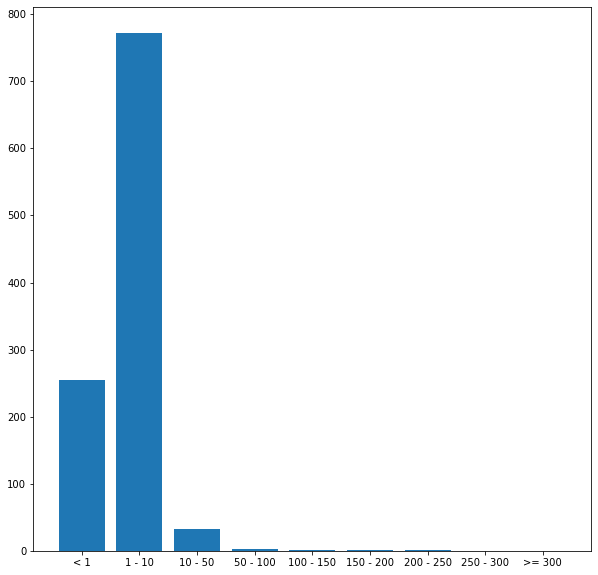

In [28]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.bar(range(len(price_)), list(price_.values()), align='center')
plt.xticks(range(len(price_)), list(price_.keys()))
plt.show()

Đánh giá biểu đồ:
- Có thể thấy lượng app trả phí có chứa quảng cáo tập trung vào mức giá < 50 đô và rất ít hoặc không có trong các app > 50 đô.
- Mức giá từ 1 đến 10 đô có số lượng các app nhiều nhất.
- Mức giá bé hơn 1 đô có số lượng các app nhiều thứ hai.
- Như vậy, với các app có phí, vẫn có thể gắn quảng cáo, nhưng mức phí chỉ nên từ 10 đô trở xuống, giá cao mà vẫn có quảng cáo người dùng có thể không hài lòng và với ứng dụng có giá cao, việc gắn quảng cáo cũng là không cần thiết vì mức thu từ quảng cáo có thể không là bao so với phí ứng dụng.

# Nhìn lại quá trình làm đồ án

## Hân:
**1. Những khó khăn gặp phải:**
    - Gặp nhiều vấn đề trong việc upload file lên github thông qua git.
    - Khó khăn trong việc tiền xử lí, phải tìm các cột, các giá trị bất hợp lí để xử lí mà không phải lúc nào cũng dễ dàng nhận ra được.
    - Đặt câu hỏi có ý nghĩa để trả lời.
    
**2. Những điều đã học được:**
    - Biết thêm một số trang web cung cấp dữ liệu.
    - Học được nhiều hơn về python, đặc biệt là pandas.
    - Suy nghĩ về việc trả lời câu hỏi thế nào quá nhiều trong lúc đặt câu hỏi khiến cho câu hỏi không được hay lắm.